In [294]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('db.sqlite')
df = pd.read_sql_query("SELECT * FROM LostItem", cnx)

In [295]:
df


,id,code_uic_gare_origine,date,type_objet,gare,date_restitution
0,46aa8bd680d64ff47521f2f9565b3af08101f777,0087271007,2016-01-31T21:49:49+00:00,Pièces d'identités et papiers personnels,Paris Gare du Nord,None
1,1429134dd10f77c7c671483321efee8b13b0a566,0087271007,2016-01-31T21:30:04+00:00,"Appareils électroniques, informatiques, appare...",Paris Gare du Nord,None
2,924a6fe7511fe141cb270665f2047ecdd2992efa,0087773002,2016-01-31T21:29:14+00:00,"Bagagerie: sacs, valises, cartables",Montpellier Saint-Roch,None
3,4232bb601ebfe57bff6005540ae6bf34254464db,0087773002,2016-01-31T21:27:25+00:00,Divers,Montpellier Saint-Roch,None
4,92bb57fd33d69e655f519b3ccc321f1f62583407,0087271007,2016-01-31T21:23:22+00:00,"Bagagerie: sacs, valises, cartables",Paris Gare du Nord,2016-02-05T17:36:20+00:00
...,...,...,...,...,...,...
413249,8b42bc917b8b5c638bc28d521a575e64954700b1,0087683268,2021-12-01T07:24:00+00:00,Articles médicaux,Laroche - Migennes,None
413250,9a2c4bc35885a627d404c6091f59d05bddafc8c8,0087212027,2021-12-01T07:11:54+00:00,"Bagagerie: sacs, valises, cartables",Strasbourg,None
413251,78590bbae89c18bbb148f8c67703e288691f32ae,0087411017,2021-12-01T05:44:51+00:00,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,2021-12-04T10:51:54+00:00
413252,0d523cedaf517d472690f8056a650ef4ba48a8a0,0087723197,2021-12-01T05:25:12+00:00,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,None


In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df['date'] = pd.to_datetime(df['date'])


In [298]:
df_objet =df[['date','type_objet']]

In [299]:
df_objet

,date,type_objet
0,2016-01-31 21:49:49+00:00,Pièces d'identités et papiers personnels
1,2016-01-31 21:30:04+00:00,"Appareils électroniques, informatiques, appare..."
2,2016-01-31 21:29:14+00:00,"Bagagerie: sacs, valises, cartables"
3,2016-01-31 21:27:25+00:00,Divers
4,2016-01-31 21:23:22+00:00,"Bagagerie: sacs, valises, cartables"
...,...,...
413249,2021-12-01 07:24:00+00:00,Articles médicaux
413250,2021-12-01 07:11:54+00:00,"Bagagerie: sacs, valises, cartables"
413251,2021-12-01 05:44:51+00:00,"Clés, porte-clés, badge magnétique"
413252,2021-12-01 05:25:12+00:00,"Appareils électroniques, informatiques, appare..."


In [300]:
df_objet_week =df_objet.resample('W', on='date').count()

In [301]:
df_objet_week = df_objet_week.reset_index()

In [302]:
df_objet_week.columns


Index(['date', 'type_objet'], dtype='object')

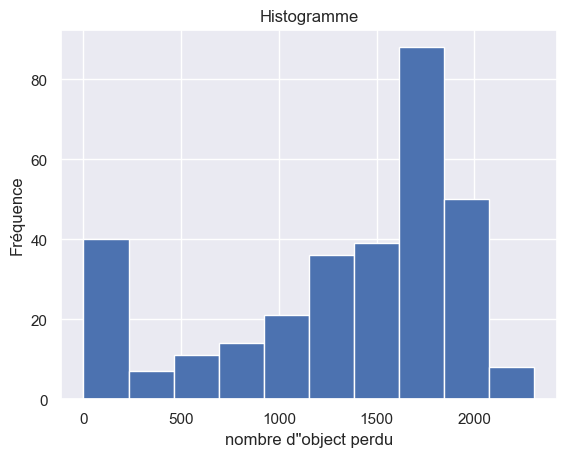

In [303]:
plt.hist(df_objet_week['type_objet'],bins=10)
plt.title('Histogramme')
plt.xlabel('nombre d"object perdu')
plt.ylabel('Fréquence')
plt.show()

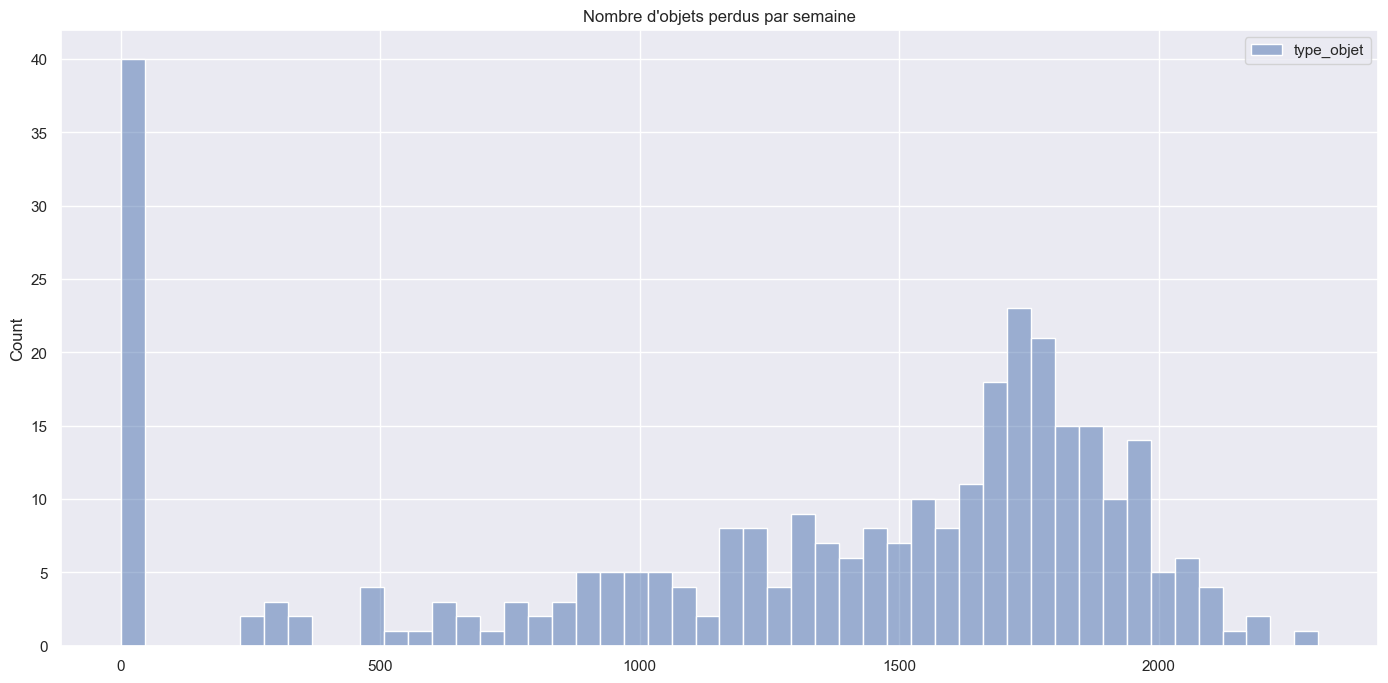

In [304]:
plt.figure(figsize=(17,8))

plt.title("Nombre d'objets perdus par semaine")
sns.set(style="darkgrid")

sns.histplot(data=df_objet_week, bins=50)

plt.show()


In [305]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

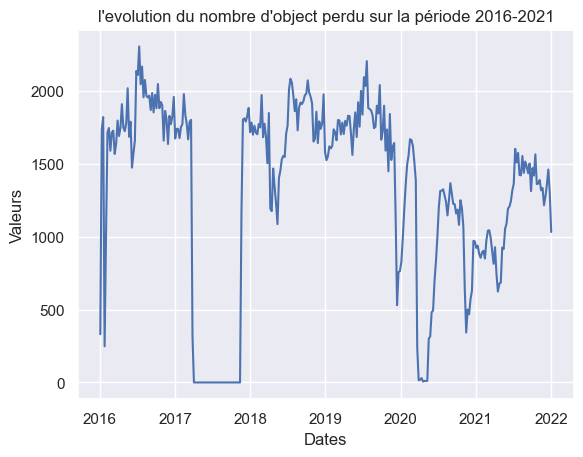

In [306]:
date = df_objet_week['date']
valeur = df_objet_week['type_objet']
plt.plot(date,valeur)
plt.title("l'evolution du nombre d'object perdu sur la période 2016-2021")
plt.xlabel('Dates')
plt.ylabel('Valeurs')
plt.show()


In [307]:
import plotly.express as px

In [308]:
fig = px.line(df_objet_week, x="date", y="type_objet",title="Evolution du nombre d'objets perdus sur la période 2016-2021")

fig.update_layout(
    xaxis_title="semaine",
    yaxis_title="Nombre d'objets perdus",
    legend_title="Type d'objet",
    showlegend=True
)

fig.show()

In [309]:
cnx = sqlite3.connect('db.sqlite')
df_frequentation = pd.read_sql_query("SELECT * FROM Frequentation", cnx)

In [344]:
df

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution
0,46aa8bd680d64ff47521f2f9565b3af08101f777,0087271007,2016-01-31 21:49:49+00:00,Pièces d'identités et papiers personnels,Paris Gare du Nord,None
1,1429134dd10f77c7c671483321efee8b13b0a566,0087271007,2016-01-31 21:30:04+00:00,"Appareils électroniques, informatiques, appare...",Paris Gare du Nord,None
2,924a6fe7511fe141cb270665f2047ecdd2992efa,0087773002,2016-01-31 21:29:14+00:00,"Bagagerie: sacs, valises, cartables",Montpellier Saint-Roch,None
3,4232bb601ebfe57bff6005540ae6bf34254464db,0087773002,2016-01-31 21:27:25+00:00,Divers,Montpellier Saint-Roch,None
4,92bb57fd33d69e655f519b3ccc321f1f62583407,0087271007,2016-01-31 21:23:22+00:00,"Bagagerie: sacs, valises, cartables",Paris Gare du Nord,2016-02-05T17:36:20+00:00
...,...,...,...,...,...,...
413249,8b42bc917b8b5c638bc28d521a575e64954700b1,0087683268,2021-12-01 07:24:00+00:00,Articles médicaux,Laroche - Migennes,None
413250,9a2c4bc35885a627d404c6091f59d05bddafc8c8,0087212027,2021-12-01 07:11:54+00:00,"Bagagerie: sacs, valises, cartables",Strasbourg,None
413251,78590bbae89c18bbb148f8c67703e288691f32ae,0087411017,2021-12-01 05:44:51+00:00,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,2021-12-04T10:51:54+00:00
413252,0d523cedaf517d472690f8056a650ef4ba48a8a0,0087723197,2021-12-01 05:25:12+00:00,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,None


In [310]:
df_frequentation

,id,code_uic,code_postal,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021
0,b9d3897abe06503d7292e62d6eccb60b69abda0f,87313759,60220,41096,43760,40228,42685,32396,51811
1,17490c4412b66efeb8c79cd9862d836120599b56,87481614,44170,33021,35637,38027,38473,22773,27466
2,4e5102473d4b31c10bba7021e4670a60f22241e0,87317362,80100,727081,750298,710325,757362,505759,650701
3,1dbc2703886fa415962e6711dfcbffdbb1f1297f,87545269,94480,1453063,1471462,1462108,1457253,660309,1594567
4,ea61d2ec6795404bf06d5ba2711a795b8b3f4202,87386052,78100,238687,235698,228032,221003,126513,209673
...,...,...,...,...,...,...,...,...,...
2965,8a1df06ac2eefc9953f6231c96a9cebec1670390,87645101,15130,34,25,26,49,17,37
2966,d3fec485ad85adccecc617d97f8295041e421d81,87191304,57110,1930,1300,1484,1186,804,873
2967,dac5c3fa77ccdb4efb214d0d8c213744c6334377,87413385,76190,909234,920117,902928,997167,687572,787592
2968,5ade20cb71722a51e605730eacb0dd94a87477d4,87193649,57115,17306,17152,14705,15244,17810,12777


In [311]:
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine


In [312]:
engine = create_engine('sqlite:///db.sqlite')
connection = engine.connect()

In [313]:
request = """ 
    SELECT Gare.code_uic, Gare.code_departement,Gare.code_postal,Gare.longitude,Gare.latitude,LostItem.date, LostItem.type_objet
    FROM Gare
    JOIN LostItem
    ON Gare.code_uic =LostItem.code_uic_gare_origine
"""
df_gare_item = pd.read_sql(request, connection,index_col="date")
df_gare_item.index = pd.to_datetime(df_gare_item.index)


In [314]:
df_gare_item

,code_uic,code_departement,code_postal,longitude,latitude,type_objet
date,,,,,,
2016-01-02 18:19:42+00:00,0087781104,11,11100,3.005910,43.190387,"Vêtements, chaussures"
2016-01-03 17:16:59+00:00,0087781104,11,11100,3.005910,43.190387,"Bagagerie: sacs, valises, cartables"
2016-01-12 16:16:39+00:00,0087781104,11,11100,3.005910,43.190387,"Appareils électroniques, informatiques, appare..."
2016-01-14 19:50:56+00:00,0087781104,11,11100,3.005910,43.190387,"Porte-monnaie / portefeuille, argent, titres"
2016-01-18 11:15:43+00:00,0087781104,11,11100,3.005910,43.190387,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...,...
2019-04-08 12:45:05+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"
2019-04-19 18:50:47+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"
2019-06-08 10:20:24+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"


In [315]:
df_gare_item = df_gare_item.reset_index()
df_gare_item

,date,code_uic,code_departement,code_postal,longitude,latitude,type_objet
0,2016-01-02 18:19:42+00:00,0087781104,11,11100,3.005910,43.190387,"Vêtements, chaussures"
1,2016-01-03 17:16:59+00:00,0087781104,11,11100,3.005910,43.190387,"Bagagerie: sacs, valises, cartables"
2,2016-01-12 16:16:39+00:00,0087781104,11,11100,3.005910,43.190387,"Appareils électroniques, informatiques, appare..."
3,2016-01-14 19:50:56+00:00,0087781104,11,11100,3.005910,43.190387,"Porte-monnaie / portefeuille, argent, titres"
4,2016-01-18 11:15:43+00:00,0087781104,11,11100,3.005910,43.190387,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...,...,...
436114,2019-04-08 12:45:05+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"
436115,2019-04-19 18:50:47+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"
436116,2019-06-08 10:20:24+00:00,0087191007,57,57100,6.169543,49.353931,"Bagagerie: sacs, valises, cartables"
436117,2019-06-14 13:18:30+00:00,0087191007,57,57100,6.169543,49.353931,Pièces d'identités et papiers personnels


In [321]:
df1 = df_gare_item.groupby(['code_departement','code_postal']).resample('Y',on ='date').agg({'type_objet':'size'})

In [322]:
df1

type_objet
code_departement code_postal date                                 
01               01000       2016-12-31 00:00:00+00:00         187
                             2017-12-31 00:00:00+00:00          53
                             2018-12-31 00:00:00+00:00          99
                             2019-12-31 00:00:00+00:00          88
                             2020-12-31 00:00:00+00:00          29
...                                                            ...
95               95716       2018-12-31 00:00:00+00:00         857
                             2019-12-31 00:00:00+00:00         734
                             2020-12-31 00:00:00+00:00         420
                             2021-12-31 00:00:00+00:00         553
                 95800       2016-12-31 00:00:00+00:00           7

[935 rows x 1 columns]

In [323]:
df1 = df1.reset_index()



In [324]:
df1

,code_departement,code_postal,date,type_objet
0,01,01000,2016-12-31 00:00:00+00:00,187
1,01,01000,2017-12-31 00:00:00+00:00,53
2,01,01000,2018-12-31 00:00:00+00:00,99
3,01,01000,2019-12-31 00:00:00+00:00,88
4,01,01000,2020-12-31 00:00:00+00:00,29
...,...,...,...,...
930,95,95716,2018-12-31 00:00:00+00:00,857
931,95,95716,2019-12-31 00:00:00+00:00,734
932,95,95716,2020-12-31 00:00:00+00:00,420
933,95,95716,2021-12-31 00:00:00+00:00,553


In [326]:

df1['year'] = pd.DatetimeIndex(df1['date']).year

In [327]:
df1

,code_departement,code_postal,date,type_objet,year
0,01,01000,2016-12-31 00:00:00+00:00,187,2016
1,01,01000,2017-12-31 00:00:00+00:00,53,2017
2,01,01000,2018-12-31 00:00:00+00:00,99,2018
3,01,01000,2019-12-31 00:00:00+00:00,88,2019
4,01,01000,2020-12-31 00:00:00+00:00,29,2020
...,...,...,...,...,...
930,95,95716,2018-12-31 00:00:00+00:00,857,2018
931,95,95716,2019-12-31 00:00:00+00:00,734,2019
932,95,95716,2020-12-31 00:00:00+00:00,420,2020
933,95,95716,2021-12-31 00:00:00+00:00,553,2021


In [ ]:
df_merge = pd.merge(df1,df_frequentation,on = 'code_postal')

In [328]:
df_merge

,code_postal,type_objet,id,code_uic,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021
0,10014,120,87b4b35853c342fbfe8e7e7190bccb94b1210afd,87118000,969326,1023685,967315,1008126,674479,853731
1,10014,8,87b4b35853c342fbfe8e7e7190bccb94b1210afd,87118000,969326,1023685,967315,1008126,674479,853731
2,10014,13,87b4b35853c342fbfe8e7e7190bccb94b1210afd,87118000,969326,1023685,967315,1008126,674479,853731
3,11000,52,a6094f066122f87624941a398f256317adefb327,87615286,786810,844291,693148,775306,565381,820367
4,11000,33,a6094f066122f87624941a398f256317adefb327,87615286,786810,844291,693148,775306,565381,820367
...,...,...,...,...,...,...,...,...,...,...
1243,95100,55,78f52ea6603558b408bc2a8b5d17ee9e08ee4dda,87381848,15388969,15608674,16094786,16219640,8206484,14527144
1244,95100,55,387afcd0acfb7cf536589e2fef472680be933518,87381798,5880591,6168065,6368082,6554397,3403105,5607085
1245,95800,7,fcef0d6f949b7f77f2f3f3b42c4c40313b93f665,87382655,6743592,6809697,6755489,6739264,3298015,4571827
1246,95800,7,7cefdf5a88b40f10f152fe154692088963ec2b61,87381905,12213175,12347999,12279673,12236286,5992100,8094593


In [329]:
df_merge.columns

Index(['code_postal', 'type_objet', 'id', 'code_uic', 'total_voyageurs_2016',
       'total_voyageurs_2017', 'total_voyageurs_2018', 'total_voyageurs_2019',
       'total_voyageurs_2020', 'total_voyageurs_2021'],
      dtype='object')

In [331]:
df_by_code_uic = df_merge.groupby(['code_postal','code_uic','total_voyageurs_2016',
       'total_voyageurs_2017', 'total_voyageurs_2018', 'total_voyageurs_2019',
       'total_voyageurs_2020', 'total_voyageurs_2021']).agg({'type_objet':'sum'})

In [336]:
df_by_code_uic =df_by_code_uic.reset_index()
df_by_code_uic

,index,code_postal,code_uic,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021,type_objet
0,0,10014,87118000,969326,1023685,967315,1008126,674479,853731,141
1,1,11000,87615286,786810,844291,693148,775306,565381,820367,255
2,2,11100,87781104,1508061,1498171,1225596,1238902,1045543,1569858,1132
3,3,13232,87751008,13544008,14450431,13681361,14629257,9569704,13225716,15364
4,4,13592,87319012,3403078,3699076,3597729,3594151,2059068,2916645,1617
...,...,...,...,...,...,...,...,...,...,...
225,225,95100,87381798,5880591,6168065,6368082,6554397,3403105,5607085,71
226,226,95100,87381848,15388969,15608674,16094786,16219640,8206484,14527144,71
227,227,95800,87381905,12213175,12347999,12279673,12236286,5992100,8094593,7
228,228,95800,87382499,6806298,7125540,7359555,7560627,5544432,8547410,7


In [337]:
df_by_code_postal = df_by_code_uic.groupby('code_postal').agg({'type_objet':'sum','total_voyageurs_2016':'sum','total_voyageurs_2017':'sum','total_voyageurs_2018':'sum','total_voyageurs_2019':'sum','total_voyageurs_2020':'sum','total_voyageurs_2021':'sum'})

In [338]:
df_by_code_postal = df_by_code_postal.reset_index()

In [339]:
df_by_code_postal

,code_postal,type_objet,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021
0,10014,141,969326,1023685,967315,1008126,674479,853731
1,11000,255,786810,844291,693148,775306,565381,820367
2,11100,1132,1508061,1498171,1225596,1238902,1045543,1569858
3,13232,15364,13544008,14450431,13681361,14629257,9569704,13225716
4,13592,1617,3403078,3699076,3597729,3594151,2059068,2916645
...,...,...,...,...,...,...,...,...
156,90400,561,07396760,07917130,138573360887,330187397931924,19146360875948,309764761671007
157,91300,2655,30474345541751984315,31681045926053049726,32252745095212397978,33040344786812214961,461096356451371156,37214646759881789137
158,92210,64,84621031629247,87584171675790,88787631695453,90747571722096,4434121788261,58377921051675
159,95100,142,588059115388969,616806515608674,636808216094786,655439716219640,34031058206484,560708514527144


In [342]:
mask = df_merge['code_postal']==95800

In [343]:
df_merge[mask]

,code_postal,type_objet,id,code_uic,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021


In [ ]:
df_gare_item = df_gare_item.groupby('code_uic')['type_objet'].size()

In [ ]:
df_gare_item

code_uic
0087111849    1678
0087113001    7423
0087118000     141
0087141002    3648
0087141150     122
              ... 
0087775007    1419
0087781005     984
0087781104    1132
0087784009    2916
0087785006       5
Name: type_objet, Length: 177, dtype: int64

In [ ]:
df_merge = pd.merge(df_gare_item,df_frequentation,on = 'code_uic')

In [ ]:
df_merge.head(10)

,date,code_uic,code_departement,code_postal_x,longitude,latitude,type_objet,id,code_postal_y,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021


In [ ]:
df_region_type_objet = df_gare_item[['date','code_departement','type_objet']]
# df_region_type_objet.index = pd.to_datetime(df_region_type_objet.index)

In [ ]:
df_region_type_objet

,date,code_departement,type_objet
0,2016-01-02 18:19:42+00:00,11,"Vêtements, chaussures"
1,2016-01-03 17:16:59+00:00,11,"Bagagerie: sacs, valises, cartables"
2,2016-01-12 16:16:39+00:00,11,"Appareils électroniques, informatiques, appare..."
3,2016-01-14 19:50:56+00:00,11,"Porte-monnaie / portefeuille, argent, titres"
4,2016-01-18 11:15:43+00:00,11,"Bagagerie: sacs, valises, cartables"
...,...,...,...
436114,2019-04-08 12:45:05+00:00,57,"Bagagerie: sacs, valises, cartables"
436115,2019-04-19 18:50:47+00:00,57,"Bagagerie: sacs, valises, cartables"
436116,2019-06-08 10:20:24+00:00,57,"Bagagerie: sacs, valises, cartables"
436117,2019-06-14 13:18:30+00:00,57,Pièces d'identités et papiers personnels


In [ ]:
# df_region_type_objet = df_region_type_objet.groupby('code_departement').resample('Y').agg("count")
df_region_type_objet = df_region_type_objet.groupby('code_departement').resample('Y',on ='date').agg("count")

In [ ]:
df_region_type_objet = df_region_type_objet['type_objet']

In [ ]:
df_region_type_objet.reset_index()

,code_departement,date,type_objet
0,01,2016-12-31 00:00:00+00:00,405
1,01,2017-12-31 00:00:00+00:00,128
2,01,2018-12-31 00:00:00+00:00,241
3,01,2019-12-31 00:00:00+00:00,220
4,01,2020-12-31 00:00:00+00:00,114
...,...,...,...
448,95,2017-12-31 00:00:00+00:00,283
449,95,2018-12-31 00:00:00+00:00,857
450,95,2019-12-31 00:00:00+00:00,738
451,95,2020-12-31 00:00:00+00:00,432


In [ ]:
import folium

In [ ]:
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

In [ ]:
m